## Reducing Order for Accelerated Analysis:  *One Guy’s Take on SVD, POD, DMD, and Their Use for Nuclear Engineering*

Jeremy Roberts, Associate Professor \
Alan Levin Department of Mechanical and Nuclear Engineering \
Kansas State University

Wednesday, January 27th, 2021

Rothrock Lecture Series \
Department of Nuclear Engineering \
Texas A&M University

## I Spotted a Bear that Changed My World


Karhunen and Loève said a stochastic process $X_t$  with covariance $K_X(t, t')$ can be represented exactly (or approximately) as an infinite (or a finite), weighted sum of the (time-dependent) eigenvectors of a certain functional of $K_{X}$.

Let $\mathbf{x}_j$ be a column of an image (i.e., matrix) $\mathbf{A}$.

Then 

$$
\mathbf{C}_{ij} = E[(\mathbf{x}_i-\mathbf{m})^T (\mathbf{x}_j-\mathbf{m})] \, ,
$$

for $\mathbf{m} = E[\mathbf{x}]$, and eigendecomposition leads to

$$
\mathbf{C} = \mathbf{W}\boldsymbol{\Lambda}\mathbf{W}^T \, .
$$

Define $\mathbf{y} = \mathbf{W}^T\mathbf{x}$ (or $\mathbf{B} = \mathbf{W}^T\mathbf{A}$).  By construction, $\mathbf{W}^T$ rotates the columns $\mathbf{x}$ so that the result is decorrelated, i.e., diagonalized.  Moreover, the columns of $\mathbf{W}$ with the largest eigenvalues $\lambda$ preserve the most “energy” of the initial system upon the inverse (or a "best" picture).

This is (often, but maybe not correctly) called the Karhunen-Loève Transform.

<font size=1> (See R.D. Dony, "Karhunen-Loève Transform". *The Transform and Data Compression Handbook*
Ed. K. R. Rao and P.C. Yip. Boca Raton, CRC Press LLC, 2001.) </font>

<img src="https://untappd.akamaized.net/site/beer_logos_hd/beer-39540_4afaf_hd.jpeg" width=300px>

## Whoa, slow down.  Show me the SVD.

First, what does "best" mean?  Least squares?  Minimax?  

Given $\mathbf{A} \in R^{m\times n}$ of rank $\min(m, n)$, can we find $\tilde{\mathbf{A}}  \in R^{m\times n}$ of rank $r < \min(m, n)$ that satisfies 

$$
 \min_{\tilde{A}} \sqrt{\sum_j \sum_i (A_{ij} - \tilde{A}_{ij})^2} \qquad \text{least-square pixel error}
$$

Equivalently, where $\mathbf{x}$ is a column of $\mathbf{A}$, find $\tilde{\mathbf{A}}$ that satisfies

$$
 \min_{\tilde{A}} \sqrt{\sum_j ||\mathbf{x}_i - \tilde{\mathbf{x}}_i||_2^2} 
 \qquad \text{root-mean square column error}
$$

Both are useful ways to think of the problem since applications are often about "all the pixels" or "all the columns."

The solution, of course, is the singular value decomposition (SVD), or 

$$
  \mathbf{A} = \mathbf{U}\boldsymbol{\Sigma}\mathbf{V}^T \, ,
$$

where $\mathbf{U} \in R^{m, n}$, $\boldsymbol{\Sigma} \in R^{n, n}$ is a diagonal matrix of strictly nonnegative *singular* values $\sigma_i,\, i = 1\ldots n$ such that $\sigma_i \geq \sigma_{i+1}$, and $\mathbf{V} \in R^{n, n}$. Both $\mathbf{U}$ and $\mathbf{V}$ are orthogonal matrices (i.e., $\mathbf{U}^T \mathbf{U} = \mathbf{I}$).

Proof is left to the viewer... but the *truncated* SVD  $\mathbf{U}$ yields the approximation $\tilde{\mathbf{A}} = \mathbf{U}_r \boldsymbol{\Sigma}_r \mathbf{V}_r^T$ that uses the first $r$ columns $\mathbf{U}$ and minimizes

$$
  \sqrt{\sum_j \sum_i (A_{ij} - \tilde{A}_{ij})^2} = || \tilde{\mathbf{A}} - \mathbf{A} ||_F  \, .
$$

among all possible rank-$r$ approximations $\mathbf{A}$.  

In [1]:
import urllib
url = 'https://unsplash.com/photos/f1q4NlVRYSc/download?force=true&w=2400'
urllib.request.urlretrieve(url , 'snake.jpg')
import matplotlib.pyplot as plt
A_rgb = plt.imread('snake.jpg')   # 1737x2400 matrix of RGB tuples
plt.imshow(A_rgb)

In [2]:
import numpy as np
A = np.array(A_rgb.reshape((A_rgb.shape[0], A_rgb.shape[1]*A_rgb.shape[2])), dtype='float')
U, sigma, V = np.linalg.svd(A, compute_uv=True) # sigma is a 1-d array

Text(0.5, 1.0, 'Most information in first ~100 singular values.')

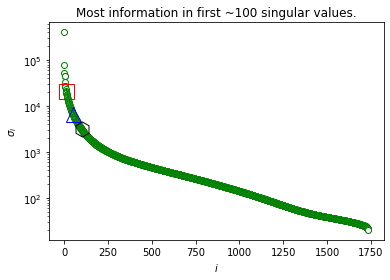

In [3]:
import matplotlib.pyplot as plt
plt.semilogy(sigma, 'go', mfc='w')
plt.semilogy(10, sigma[10], 'rs', 50, sigma[50], 'b^', 100, sigma[100], 'kh', mfc='None', ms=15)
plt.xlabel('$i$'); plt.ylabel('$\sigma_i$'); plt.title("Most information in first ~100 singular values.")

Text(0.5, 1.0, 'n=100,  92.9% compression')

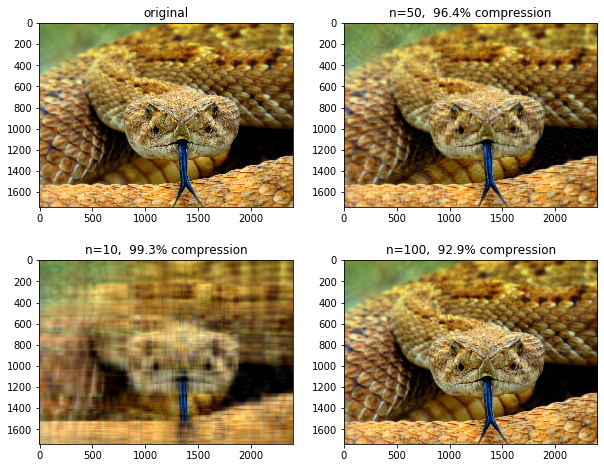

In [4]:
A_r = []
for r in [10, 50, 100]:
    Sigma = np.diag(sigma) # make Sigma a diagonal matrix
    A_r.append(U[:, :r]@(Sigma[:r, :r]@V[:r, :])) # one can also try sklearn.decomposition.TruncatedSVD
    A_r[-1] = np.array(A_r[-1].reshape((1737, 2400, 3)), dtype='i')
    A_r[-1][A_r[-1]<0]=0; A_r[-1][A_r[-1]>255]=255;
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8))
axes[0, 0].imshow(A_rgb); axes[0,0].set_title('original')
tmpl = 'n={},  {:.1f}% compression'
comp = lambda n: (1-(U.shape[0]+V.shape[0])*n/A.shape[0]/A.shape[1])*100
axes[1, 0].imshow(A_r[0]); axes[1,0].set_title(tmpl.format(10, comp(10)))
axes[0, 1].imshow(A_r[1]); axes[0,1].set_title(tmpl.format(50, comp(50)))
axes[1, 1].imshow(A_r[2]); axes[1,1].set_title(tmpl.format(100, comp(100)))

# Um, the Bear?

Forget about the mean $\mathbf{m} = E[\mathbf{x}]$ (or assume zero, etc.).  Then

$$
  \mathbf{W}\boldsymbol{\Lambda}\mathbf{W}^T =  \mathbf{C}  
     = \mathbf{A}^T \mathbf{A} = (\mathbf{U}\boldsymbol{\Sigma}\mathbf{V}^T)^T \mathbf{U}\boldsymbol{\Sigma}\mathbf{V}^T = \mathbf{V}\boldsymbol{\Sigma}^T \mathbf{U}^T \mathbf{U}\boldsymbol{\Sigma}\mathbf{V}^T
     = \mathbf{V}\boldsymbol{\Sigma}^2 \mathbf{V}^T \, .
$$


Similarly, 

$$
 (\mathbf{C}^T \neq ) \quad \mathbf{A} \mathbf{A}^T  = \mathbf{U}\boldsymbol{\Sigma}^2 \mathbf{U}^T \, .
$$

So, our original projection $\mathbf{y} = \mathbf{W}^T \mathbf{x}$ can be viewed as a projection of $\mathbf{x}$ onto the right singular vectors $\mathbf{v}$ of $\mathbf{A}$ or, equivalently, the row space of $\mathbf{A}$.

With SVD, it's easy to see more clearly what we have:

$$
\mathbf{A} \approx  \sigma_1 \mathbf{u}_1 \mathbf{v}^T_1 + \sigma_2 \mathbf{u}_2 \mathbf{v}^T_2 + \ldots \, 
$$

In other words, we construct $\mathbf{A}$ by adding rank-1 matrices (outer products) weighted by the singular values. 

# SVD to POD

For simplicity, consider an "expensive" model that has already been discretized in space, e.g.,

$$
  \frac{d\mathbf{x}}{dt} = \mathbf{L} \mathbf{x} + \mathbf{q} \, ,
$$

where $x_i(t) \equiv x(r_i, t)$,  $\mathbf{x},\mathbf{q} \in R^{m\times 1}$, and $\mathbf{L} \in R^{m\times m}$.  Then

  1. Chop up time and compute the "snapshots" $\mathbf{x}_0, \mathbf{x}_1, \ldots$ for $t = t_0, t_1, \ldots$.

 2. Place the snapshot into the matrix $\mathbf{X}$.

  3. Compute the SVD of $\mathbf{X}$ to determine the principle "directions" (or "components") of the observed field, i.e., the first $r$ left singular vectors $\mathbf{U} \in R^{m\times r}$.

4. At this point, the data (whether from our expensive model or, perhaps, from experiment) can be projected onto the reduced space $\mathbf{U}^{T}\mathbf{x} = \mathbf{y}$ and recovered (approximately) through  $\mathbf{x} = \mathbf{Uy}$.  This application, strongly rooted in statistics, was first(?) reported in 1967 by Lumley for analysis of *experimental* data.

5. Substitute $\mathbf{x} = \mathbf{Uy}$  into our model to find

$$
\frac{d}{dt}\mathbf{Uy} = \mathbf{LUy} + \mathbf{q} \, .
$$

Think carefully about the emphasis here on $\mathbf{U}$!

6.  Multiply this result equation on the left by $\mathbf{U}^T$ to find

$$
  \mathbf{U}^T \frac{d}{dt} \mathbf{Uy} = \mathbf{U}^{T} \mathbf{LUy} + \mathbf{U}^T \mathbf{q} \, .
$$

or, because $\mathbf{U}^T = \mathbf{U}^{-1}$,

$$
   \frac{d\mathbf{y}}{dt} = \tilde{\mathbf{L}}\mathbf{y} + \tilde{\mathbf{q}} \, .
$$

This is, generically, the Galerkin-POD method.  Here, Galerkin indicates $\mathbf{U}$ is used for both representing $\mathbf{x}$ (test) and diagonalizing the system via projection (trial).

If $r \ll m$, this system is *way easier to solve*.  The "coefficients" $\mathbf{y}$ can be found, and the original field reconstructed via $\mathbf{x} = \mathbf{Uy}$. 

6. I'm totally skipping boundary conditions, nonlinearities, blah blah.  The point is that POD is use of SVD to shrink the system.  The orthogonality leaves a single derivative on the left, i.e., a system that looks mightily unchanged.

# POD for Multigroup Models

Some of my work has dealt with the $k$-eigenvalue problem:

$$
  \boldsymbol{\hat{\Omega}}  \cdot \nabla \psi_{c,g}(\boldsymbol{\hat{\Omega}}) +
    \Sigma^{t}_{c,g} \psi_{c,g}(\boldsymbol{\hat{\Omega}}) = 
    \frac{1}{4\pi} \sum\limits^{N_g}_{g'=1} \left(\Sigma^{s}_{c,g\leftarrow g'}  + \frac{\chi_{c,g}}{k} \nu\Sigma^{f}_{c,g'}\right) \phi_{c,g'}\, .
$$

The notation is largely standard, but the $c$ indicates a spatial unknown and the $g$ indicates group.

Two questions with evolving answers that have driven my interest in POD-like things:

  - What's the best way to represent boundary conditions in so-called response-matrix methods?
  - **Can the generalized multigroup methods of Rahnema and Forget ever be of practical use?**
  
<font size=1>
See, e.g., these: <br>
Rahnema, Farzad, Steven Douglass, and Benoit Forget. "Generalized energy condensation theory." Nuclear Science and Engineering 160.1 (2008): 41-58. <br>
Zhu, Lei, and Benoit Forget. "A discrete generalized multigroup energy expansion theory." Nuclear Science and Engineering 166.3 (2010): 239-253.
</font>

## The Discrete-Generalized Multigroup Method


Start by collecting fine groups (indexed by $g$) into coarse groups (indexed by $G$):

\begin{equation}
  \boldsymbol{\hat{\Omega}}  \cdot \nabla \psi_{c,g}(\boldsymbol{\hat{\Omega}}) +
    \Sigma^{t}_{c,g} \psi_{c,g}(\boldsymbol{\hat{\Omega}}) = 
    \frac{1}{4\pi} \sum\limits^{N_G}_{G'=1} \sum\limits_{g'\in G'} \left (\Sigma^{s}_{c,g\leftarrow g'} +
    \frac{\chi_{c,g}}{k} \nu\Sigma^{f}_{c,g'} \right ) \phi_{c,g'} \, .
\end{equation}

Suppose we have a set of vectors $P^G_{i,g}$ that satisfy $P^G_{0,g} = \alpha \mathbf{1}$ and 

\begin{equation}
 \sum\limits_{g\in G} P^G_{i,g} P^G_{j,g} = \delta_{ij} \, .
\end{equation}

Then let 
\begin{equation}
 \psi_{c,G,i} (\boldsymbol{\hat{\Omega}})  \equiv \sum\limits_{g\in G} P^G_{i,g} \psi_{c,g} (\boldsymbol{\hat{\Omega}}) 
 \qquad \text{and} \qquad
 \psi_{c,g}(\boldsymbol{\hat{\Omega}})  = \sum\limits^{N^G_i}_{i=0} P^G_{i,g} \psi_{c,G,i} (\boldsymbol{\hat{\Omega}})\, .
\end{equation}

We play the same POD game (substitution and multiply on the left):

\begin{equation}
 \boldsymbol{\hat{\Omega}}  \cdot \nabla \psi_{c,G,i}(\boldsymbol{\hat{\Omega}}) +
    \Sigma^{t}_{c,G,0} \psi_{c,G,i}(\boldsymbol{\hat{\Omega}}) + \delta_{c,G,i}(\boldsymbol{\hat{\Omega}}) \psi_{c,G,0}(\boldsymbol{\hat{\Omega}}) = 
    \frac{1}{4\pi} \sum\limits^{N_G}_{G'=1} \Sigma^{s}_{c,G\gets G',i} \phi_{c,G',0} +
    \frac{\chi_{c,G,i}}{4\pi k} \sum\limits^{N_G}_{G'=1} \nu\Sigma^{f}_{c,G'} \phi_{c,G',0} \, ,
\end{equation}

where, e.g.,

\begin{equation}
  \Sigma^{t}_{c,G,0} \equiv
      \frac{\sum\limits_{g\in G} \Sigma^{t}_{c,g} \phi_{c,g} }
           {\sum\limits_{g\in G} \phi_{c,g}} \, ,
 \quad 
 \delta_{c,G,i}(\boldsymbol{\hat{\Omega}}) \equiv
      \frac{\sum\limits_{g\in G} P^G_{i,g} \left(\Sigma^{t}_{c,g} - \Sigma^{t}_{c,G,0} \right ) \psi_{c,g}(\boldsymbol{\hat{\Omega}})}
           {\psi_{c,G,0}(\boldsymbol{\hat{\Omega}})} \, , \quad \text{and} \quad
  \Sigma^{s}_{c,G\gets G',i} \equiv
      \frac{\sum\limits_{g\in G} P^G_{i,g} \sum\limits_{g'\in G'} \Sigma^{s}_{c,g\leftarrow g'} \phi_{c,g'} }
           {\sum\limits_{g'\in G} \phi_{c,g'}} \, ,
\end{equation}

Some points:

 - The $i = 0$ equation is almost normal.
 - The "cross sections" can largely be precomputed (so fine-group data not needed downstream)
 - We've formally done nothing useful yet
 - If we truncate, the problem is cheaper, but is accuracy any good?

## SPH-esque Correction 

Good reactor modeling is often focused on preserving reaction rates.  In general, if we simplify our phase space (average over space, energy, reduce the order, whatever) or "homogenize", we have this sad problem:

$$
\bar{\Sigma}^\text{ref}_{r,g}\bar{\phi}^\text{ref}_{r,g} = \bar{R}^\text{ref}_{r,g} 
  \neq  \bar{R}^\text{homog}_{r,g} = \bar{\Sigma}^\text{homog}_{r,g}\bar{\phi}^\text{homog}_{r,g}\, ,
$$

In other words, the simple model (or data, or method, etc.) doesn't match the fancy one.

To balance the books, let's require that

\begin{equation}
    \bar{\Sigma}^\text{homog}_{r,g} = \bar{\Sigma}^\text{ref}_{r,g}\frac{\bar{\phi}^\text{ref}_{r,g}}{\bar{\phi}^\text{homog}_{r,g}}
    =\omega_{r,g}\bar{\Sigma}^\text{ref}_{r,g}\, ,
    \label{eq:sph}
\end{equation}

where $\omega_{r,g}$ is the SPH factor.  

Does it work for the DGM "modes"?

<img src="dgm_sph.png" width=900px>

To conclude:

  - DGM with SPH *may* provide a method that is more problem independent than traditional multigroup approaches (for equivalent "sizes").
  - POD smokes DLP
  
R. L. Reed, J. A. Roberts, *Effectiveness of the discrete generalized multi- group method based on truncated, pod-driven basis sets*, Annals of Nuclear Energy 126 (2019) 253–261.

R. L. Reed, J. A. Roberts, *Extension of the discrete generalized multigroup method using SPH factors*, under review

R. L. Reed, *Improvements to the discrete generalized multigroup method based on proper orthogonal decomposition and SPH factors*, PhD Thesis, K-State, 2019
  

# From SVD to DMD

Remember our snapshot matrix $\mathbf{X}$ from above generated by solving (or watching) a system described by $\mathbf{x}_t = \mathbf{f}(\mathbf{x}, t)$. 

For convenience, let 

$$
  \mathbf{X_+} = [\mathbf{x}_1, \mathbf{x}_2, \ldots, \mathbf{x}_n]
  \quad \text{and} \quad
  \mathbf{X_-} = [\mathbf{x}_0, \mathbf{x}_1, \ldots, \mathbf{x}_{n-1}]
$$

If $\mathbf{f}(\mathbf{x}, t) = \mathcal{A}\mathbf{x}$, then $\mathbf{x}(t) = e^{\mathcal{A}t} \mathbf{x}_0$ is known, and $\mathbf{X_+} = \mathbf{A}\mathbf{X_-}$ for $\mathbf{A} = e^{\mathcal{A} \Delta}$.

For other systems, we just hope for a good approximation to $\mathbf{A}$.

First, define

$$
  \mathbf{A} = \mathbf{X}_{+} \mathbf{X}_{-}^{\dagger} = \mathbf{X}_{+} \mathbf{V}\boldsymbol{\Sigma}^{-1}\mathbf{U}^T
$$

where $\dagger$ indicates the pseudo inverse and $\mathbf{X}_{-} = \mathbf{U}\boldsymbol{\Sigma}\mathbf{V}^T$ is the (rank-$r$, truncated) SVD.

Because $\mathbf{A}$ is large, let's define a rank-$r$ operator and its eigendecomposition:

$$
  \tilde{A} = \mathbf{U}^T \mathbf{A} \mathbf{U} \quad \longrightarrow \quad \tilde{A} = \mathbf{W}\boldsymbol{\Lambda} \mathbf{W}^T \, .
$$

It turns out that

  1.  The $\lambda$'s are eigenvalues of $\mathbf{A}$.
  2.  The vectors $ \boldsymbol{\Phi} = \mathbf{X}_+ \mathbf{V}\boldsymbol{\Sigma}^{-1}\mathbf{W}$ are
      eigenvectors of $\mathbf{A}$ and called "DMD modes."
  3.  Schmid's original work proposed $\boldsymbol{\Phi} = \mathbf{U}\mathbf{W}$.
  4.  If $\mathbf{z}$ satisfies $\mathbf{\tilde{A}}^T \mathbf{z} = \lambda \mathbf{z}$, then
      $\mathbf{U}\mathbf{z}$ is an eigenvector of $\mathbf{A}^T$.  (And suddenly, approximate, data-driven adjoints seem so....close...)
      
<font size=1>
- For an entire overview of DMD, see Kutz, J. Nathan, et al. *Dynamic mode decomposition: data-driven modeling of complex systems*. Society for Industrial and Applied Mathematics, 2016. <br> 
- Close to the first paper (but easier to get) is Schmid, Peter J. "Application of the dynamic mode decomposition to experimental data." *Experiments in fluids* 50.4 (2011): 1123-1130.
</font>

With the spectrum of $\mathbf{A}$ approximated, it follows that

$$
  \mathbf{x}(t) \approx \sum_i \mathbf{\phi}_i e^{\lambda_i t/\Delta} b_i \, ,
$$

where a common approach sets $\mathbf{b} = \boldsymbol{\Phi}^{\dagger} \mathbf{x}_0$.

# DMD for Reactor "Transients"

Three things we've tried with DMD:

  - **Approximating isotopic evolution in multi-material systems (i.e., space, time, and species)**
  - Approximating local and integral flux/power/etc. for fast(er) transients via "fitting"
  - Doing the same via projection (scoping not too successful)
  - **Pretending power (and related) iteration is a real transient headed toward steady conditions.**
  
  
<font size=1>
Abdo, Mohammad, Rabab Elzohery, and Jeremy A. Roberts. "Modeling isotopic evolution with surrogates based on dynamic mode decomposition." Annals of Nuclear Energy 129 (2019): 280-288.<br>
Abdo, et al. Analysis of the LRA Reactor Benchmark Using Dynamic Mode Decomposition. Trans ANS. 119. <br>
Elzohery, R. and Jeremy Roberts. "Exploring Transient, Neutronic, Reduced-Order Models using DMD/POD-Galerkin and Data-Driven DMD."  PHYSOR 2020.<br>
Roberts, Jeremy A., et al. "Acceleration of the power method with dynamic mode decomposition." Nuclear Science and Engineering 193.12 (2019): 1371-1378.
</font>

# Isotopics

The application was motivated by some scoping UQ done for the K-State TRIGA Reactor.  

For the analysis, nuclides were tracked in each fuel element over a set period at full power given initial loadings (and spread about those nominal values).

<img src="dmd_iso.png" width=900px>

# The Power Method

Given a matrix $\mathbf{A}$, find its largest eigenvalue $\lambda$ and corresponding eigenvector $\mathbf{v}$ by

  1. Guess $\mathbf{v}$ (normalize to 1)
  2. $\mathbf{v}' = \mathbf{Av}$
  3. $\lambda = |\mathbf{v}'|$
  4. $\mathbf{v} = \mathbf{v}' / |\mathbf{v}'|$
  5. repeat 2-4.
  
For reactor models, this sort of mimics reality: perturbed initial state dies off to the fundamental mode.  Maybe DMD can help?  The idea:

  1.  Do several PM iterations
  2.  Do DMD on those "snap shots"
  3.  Extrapolate in time and cross your fingers.

<img src="dmd_pm.png" width=900px>

So much more to chat about, but we're done for today.


Thanks - jaroberts@ksu.edu